In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
!pip install keras

/kaggle/input/android-malware-dataset-for-machine-learning/dataset-features-categories.csv
/kaggle/input/android-malware-dataset-for-machine-learning/drebin-215-dataset-5560malware-9476-benign.csv


# Importing all required modules.

In [2]:
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import models, layers

## Importing dataset.

In [3]:
df=pd.read_csv('/kaggle/input/android-malware-dataset-for-machine-learning/dataset-features-categories.csv')
df.head()

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature


In [4]:
df1=pd.read_csv('/kaggle/input/android-malware-dataset-for-machine-learning/drebin-215-dataset-5560malware-9476-benign.csv')
df1.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (92) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


### printing the shape of the given dataset.

In [5]:
print(df.shape)
print(df1.shape)

(215, 2)
(15036, 216)


In [6]:
print(df.isnull().sum())
print(df1.isnull().sum())

transact              0
API call signature    0
dtype: int64
transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64


## Handling DF1 with nan values

In [7]:
numerical_nan = [feature for feature in df1.columns if df1[feature].isna().sum()>1 and df1[feature].dtypes!='O']
numerical_nan
categorical_nan = [feature for feature in df1.columns if df1[feature].isna().sum()>0 and df1[feature].dtypes=='O']
print(categorical_nan)

[]


In [8]:
df1 = pd.get_dummies(df1)

## Using N-D-216 because DF1 dataset contains 216 columns. 

In [9]:
X_l = []
y_l = []
N = len(df1)
D = 50
for i in range(N-D-216):
    X_l.append(df1.iloc[i:i+D])
    y_l.append(df1.iloc[i+D])
X = np.array(X_l)
y = np.array(y_l)
print(X.shape, y.shape)

(14770, 50, 221) (14770, 221)


###### Training and testing.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 100)

In [11]:
m_x = layers.Input(shape = X_train.shape[1:])
m_h = layers.LSTM(10)(m_x)
m_y = layers.Dense(221)(m_h)
m = models.Model(m_x,m_y)
m.compile('adam','categorical_crossentropy','Accuracy') 
m.summary()

2022-02-28 06:57:10.553024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-28 06:57:10.681023: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-28 06:57:10.681775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-28 06:57:10.682937: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 221)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                9280      
_________________________________________________________________
dense (Dense)                (None, 221)               2431      
Total params: 11,711
Trainable params: 11,711
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = m.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),verbose=0)

2022-02-28 06:57:13.129239: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1044534400 exceeds 10% of free system memory.
2022-02-28 06:57:14.202184: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1044534400 exceeds 10% of free system memory.
2022-02-28 06:57:15.004425: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-28 06:57:17.136184: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


## Graph.

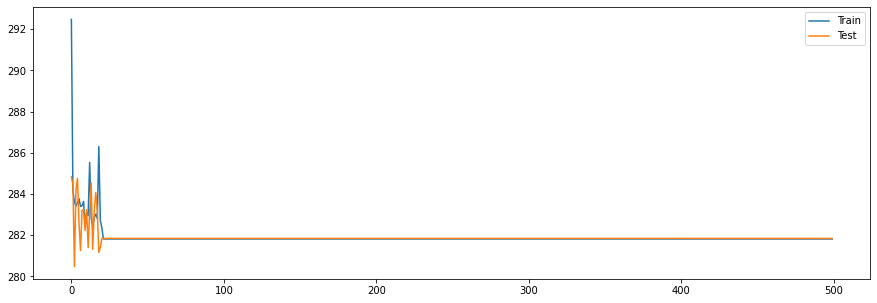

In [13]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])

## Predictions for future malwares.

In [14]:
predictions=[]
pr = m.predict(np.array(df1.iloc[-50:]).reshape(1,50,221))
predictions.append(pr[0])
for i in range(1,50):
    pr = m.predict(np.concatenate((np.array(df1[-50+i:]), predictions[:]), axis=0).reshape(1,50,221))
    predictions.append(pr[0])
for i in range(0,250):
    pr = m.predict(np.concatenate(predictions[i:],axis=0).reshape(-1,50,221))
    predictions.append(pr[0])
print(predictions)

[array([ 0.34439212, -0.3281868 ,  0.27275482,  0.35711884, -0.2775638 ,
        0.30748478,  0.41174513,  0.33632824, -0.26067287,  0.2535824 ,
       -0.3348795 ,  0.2909681 , -0.22203961,  0.31612214, -0.24638323,
       -0.18047161, -0.2750611 ,  0.36709914,  0.3133748 ,  0.43785614,
       -0.18639679,  0.28915146, -0.24532364,  0.2690832 , -0.28641236,
       -0.24988642,  0.19485244,  0.1838024 , -0.29659522,  0.29014277,
       -0.3490204 ,  0.3008936 ,  0.335742  , -0.2702546 , -0.29917857,
       -0.33940944, -0.18665554, -0.35613087, -0.19703871, -0.16871205,
       -0.17581886, -0.13793536, -0.21455829,  0.24568066,  0.30638722,
       -0.12788859, -0.23848905, -0.21233736,  0.35339552, -0.18997885,
       -0.37927333, -0.332032  , -0.29499975, -0.21441336,  0.3700006 ,
        0.14325622,  0.41486585,  0.36653617, -0.40000686,  0.17629714,
        0.1761855 , -0.15379488, -0.12198102,  0.1991547 , -0.16540812,
       -0.20407724,  0.11821999,  0.11137487, -0.33353776, -0.3

# Thank You 😃.